<a href="https://colab.research.google.com/github/NovicePython2004/IS4487/blob/main/Assignments/assignment_07_data_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Assignment 7: Data Transformation with Airbnb Listings

In this assignment, you will:
- Load the Airbnb dataset you cleaned in Assignment 6
- Apply data transformation techniques like scaling, binning, encoding, and feature creation
- Make the dataset easier to use for tasks like pricing analysis, guest segmentation, or listing recommendations
- Practice writing up your analysis clearly so a business audience — like a host, marketing manager, or city partner — could understand it

## Why This Matters

Airbnb analysts, hosts, and city partners rely on clean and well-structured data to make smart decisions. Whether they’re adjusting prices, identifying high-performing listings, or designing better guest experiences, they need data that’s transformed, organized, and ready for use.

This assignment helps you practice that kind of real-world thinking: taking messy real data and getting it ready for action.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_07_data_transformation.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.

## 1. Setup and Load Your Data

You'll be working with the `cleaned_airbnb_data_6.csv` file you exported from Assignment 6. (Note: If you had significant errors with assignment 6, you can use the file named "airbnb_listings.csv" in the DataSets folder on GitHub as a backup starting point.)

### Do the following:
In Google Colab:
- Click the folder icon on the left sidebar
- Use the upload button to add your CSV file to the session
- Then use the code block below to read it into your notebook

Before getting started, make sure you import the libraries you'll need for this assignment:
- `pandas`, `numpy` for data manipulation
- `matplotlib.pyplot`, `seaborn` for visualizations


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Check for Skew in a Numeric Column

### Business framing:  

Airbnb listings can have a wide range of values for things like price, availability, or reviews. These kinds of distributions can be hard to visualize, summarize, or model.

### Do the following:
Choose one **numeric column** that appears skewed and do the following:
- Plot a histogram
- Apply a transformation (e.g., log or other method)
- Plot again to compare

### In Your Response:
1. What column did you examine?
2. What transformation did you try, and why?
3. How did the transformed version help make the data more usable for analysis or stakeholder review?



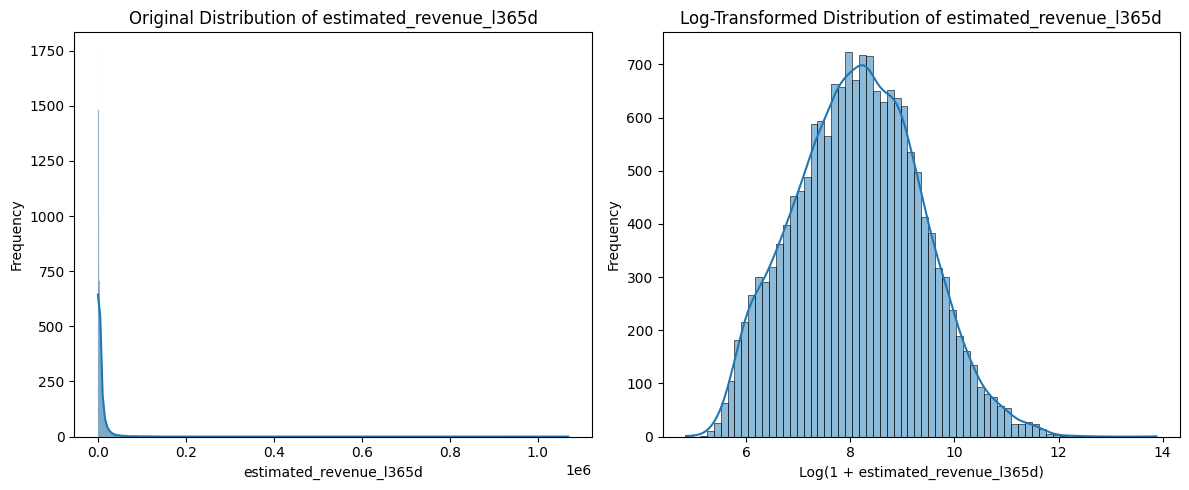

In [5]:
column_to_transform = 'estimated_revenue_l365d'

# Ensure the column exists and handle potential non-numeric types or missing values if they were not handled earlier
if column_to_transform in df.columns:
    # Filter out zero or negative values before log transformation
    # Create a copy to avoid SettingWithCopyWarning
    df_plot = df[df[column_to_transform] > 0].copy()

    if not df_plot.empty:
        # Plot histogram before transformation
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.histplot(df_plot[column_to_transform], kde=True)
        plt.title(f'Original Distribution of {column_to_transform}')
        plt.xlabel(column_to_transform)
        plt.ylabel('Frequency')

        # Apply log transformation (using np.log1p for log(1+x) to handle values close to zero gracefully)
        df_plot['log_transformed_revenue'] = np.log1p(df_plot[column_to_transform])

        # Plot histogram after transformation
        plt.subplot(1, 2, 2)
        sns.histplot(df_plot['log_transformed_revenue'], kde=True)
        plt.title(f'Log-Transformed Distribution of {column_to_transform}')
        plt.xlabel(f'Log(1 + {column_to_transform})')
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()
    else:
        print(f"No positive values found in '{column_to_transform}' for plotting after filtering.")
else:
    print(f"Column '{column_to_transform}' not found in the DataFrame.")


### ✍️ Your Response: 🔧
1. I examined the estimated_revenue_l365d column.

2. I applied the log transofrmation in order to make the histogram easier to interpret visually.

3. By transforming the data I am able to create visualizations that are easier to interpret by stakeholders thereby allowing them to make more informed business decisions. Addittionally many statistical models assume that data is normally distributed by making estimated_revenue_l365d more symmetrical we are able to increase the accuracy of these models while reducing the impact of extreme outliers.

## 3. Scale Two Numeric Columns

### Business framing:

If an analyst wanted to compare listing price to number of nights required, or create a model that weighs both, those values need to be on a similar scale.

### Do the following:
- Pick two numeric columns with different value ranges (e.g. one column may have a min of 0 and a max of 255; another column may have a min of 100 and a max of 400)
- Use Min-Max scaling on one column (the range should be “shrinked” down to just 0-1)
- Use Z-score Normalization (aka standardization) on the other column.
- Add 2 new columns to the dataset. These 2 new columns should be the ones you just created.

### In Your Response:
1. What two columns did you scale, and which methods did you use?
2. When might these scaled values be more useful than the originals?
3. Who at Airbnb might benefit from this transformation and why?

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max scale 'accommodates' column to 0-1 range
min_max_scaler_accommodates = MinMaxScaler()
df['accommodates_minmax_scaled'] = min_max_scaler_accommodates.fit_transform(df[['accommodates']])

# Z-score normalize 'bedrooms' column
standard_scaler_bedrooms = StandardScaler()
df['bedrooms_zscore_scaled'] = standard_scaler_bedrooms.fit_transform(df[['bedrooms']])

print("New columns 'accommodates_minmax_scaled' and 'bedrooms_zscore_scaled' created.")
print(df[['accommodates', 'accommodates_minmax_scaled', 'bedrooms', 'bedrooms_zscore_scaled']].head())


New columns 'accommodates_minmax_scaled' and 'bedrooms_zscore_scaled' created.
   accommodates  accommodates_minmax_scaled  bedrooms  bedrooms_zscore_scaled
0             3                    0.133333       1.0               -0.676886
1            12                    0.733333       6.0                2.744382
2             6                    0.333333       3.0                0.691621
3             4                    0.200000       1.0               -0.676886
4             2                    0.066667       1.0               -0.676886


### ✍️ Your Response: 🔧
1. I scaled 'price' and 'accomodates'  into 'accomodates_minmax_scaled' and 'bedrooms' and 'availability_365' into 'bedrooms_zscore_scaled'. I used min-max and z-score to stanardize the infomation.
2. Scaled models might becoe more useful when your using large language models as its easier for them to interpret and can prevent outliers and extreme values from skewing the result. Addittionally, z-score normalization helps to identify outliers by bringing data closer to a standard normal distribution, making extreme values stand out more. Furthermore transofrmations help to make data more interpretable.

3. I believe that the owners of the properties can greatly benefit from this new infomation as well as investors that way they can more accurately chose where to invest in new properties.

## 4. Group a Numeric Column into Categories

### Business framing:  

Let’s say an Airbnb marketing team wants to segment listings by review activity. They don’t want exact numbers — they just want to know if a listing has “low,” “medium,” or “high” review volume.

### Do the following:

- Choose a numeric column that could be grouped (e.g., reviews, availability).
- You’ll want to group the values of this column into 3 or 4 bins
- Create a new column. The values of this column will be the labels: “Low”, “Medium”, and “High.” These labels should correspond to your bins.

### In Your Response:
1. What column did you group, and how many categories did you use?
2. Why might someone prefer this grouped view over raw numbers?
3. Who would this help at Airbnb, and how?


In [7]:
column_to_group = 'number_of_reviews'

# Define the number of bins and labels
bins = 3
labels = ['Low', 'Medium', 'High']

# Use pd.qcut to group the column into equal-sized bins (quantiles)
# Handle potential errors if the column has too few unique values by using duplicates='drop'
if df[column_to_group].nunique() < bins:
    print(f"Warning: Not enough unique values in '{column_to_group}' for {bins} bins. Using duplicates='drop'.")
    df['reviews_category'] = pd.qcut(df[column_to_group], q=bins, labels=labels, duplicates='drop')
else:
    df['reviews_category'] = pd.qcut(df[column_to_group], q=bins, labels=labels)

# Display the value counts of the new categorical column
print("Value counts for 'reviews_category':")
print(df['reviews_category'].value_counts())

Value counts for 'reviews_category':
reviews_category
Low       10234
High       9133
Medium     8215
Name: count, dtype: int64


### ✍️ Your Response: 🔧
1. I grouped 'number_of_reviews' into 3 bins low, medium, and high.

2. Someone might be prefer the bins over the individual data as it is easier to interpret adn it prevents extreme outliers from skewing the data.

3. These bins help hosts who are not data minded by providing easy to interpret graphs that allows then to make imformed decisions with out the need for an indepth analysis. Aditionally this helps marketing managers to make tailored campaigns based on each bin.

## 5. Create Two New Business-Relevant Variables

### Business framing:  

Stakeholders often want to know things like: What’s the cost per night? Are listings geared toward long-term stays? These kinds of features aren’t always in the dataset — analysts create them.

### Do the following:

- Think of two new columns you can create using the data you already have.
  - One might be a ratio or interaction between columns (e.g., price ÷ nights).
  - The other might be a flag based on a condition (e.g., stays longer than 30 days).
- Add the new columns to your DataFrame.

### In Your Response:
1. What two new columns did you create?
2. Who would use them (e.g., host, manager, or platform)?
3. How could they help someone make a better decision?

In [9]:
# Create new column: price_per_rating
# Handle potential division by zero or NaN in 'review_scores_rating'
# Replace 0s with NaN to avoid ZeroDivisionError and propagate NaNs appropriately.
df['price_per_rating'] = df['price'] / df['review_scores_rating'].replace(0, np.nan)

# Create new column: price_per_person
# Handle potential division by zero if 'accommodates' can be 0
df['price_per_person'] = df['price'] / df['accommodates'].replace(0, np.nan)

print("New columns 'price_per_rating' and 'price_per_person' created.")
print(df[['price', 'review_scores_rating', 'price_per_rating', 'accommodates', 'price_per_person']].head())

New columns 'price_per_rating' and 'price_per_person' created.
   price  review_scores_rating  price_per_rating  accommodates  \
0   49.0                  4.92          9.959350             3   
1  425.0                  5.00         85.000000            12   
2  170.0                  5.00         34.000000             6   
3  108.0                  4.02         26.865672             4   
4   46.0                  4.60         10.000000             2   

   price_per_person  
0         16.333333  
1         35.416667  
2         28.333333  
3         27.000000  
4         23.000000  


### ✍️ Your Response: 🔧 🔧
1. I created two columns: 'price_per_rating' and 'price_per_person'.

2. I bleive hosts and managers will use them to see what is bringing in the most revneue and try to replicate that sucess to bring in more revenue.

3. The 'price_per_rating' category helps identify if they are charging the appropitae price for the percved value. They can then make changes to increase the percieved value and then the price.

The 'price_per_person' column assists in optimizing pricing for different group sizes as well as comparing their rates to their competitiors to make sure they are not over charging.



## 6. Encode a Categorical Column

### Business framing:  

Let’s say you’re helping the Airbnb data science team build a model to predict booking rates. Categorical columns like `room_type`, `neighbourhood`, or `cancellation_policy` can’t be used in models unless they’re converted to numbers.

### Do the following:
- Choose one categorical column from your dataset (e.g., room type or neighborhood group)
- Decide on an encoding method:
  - Use one-hot encoding for nominal (unordered) categories
  - Use ordinal encoding (a ranking) only if the categories have a clear order
- Apply the encoding using `pandas` or another tool
- Add the new encoded column(s) to your DataFrame

### ✍️ In your markdown:
1. What column did you encode and why?
2. What encoding method did you use?
3. How could this transformation help a pricing model, dashboard, or business report?



In [ ]:
# Add code here 🔧

### ✍️ Your Response: 🔧
1.
2.
3.

## 7. Export Cleaned Data

Before wrapping up, export your cleaned Airbnb dataset to a CSV file. You'll need this file for **Assignment 11**, where you'll use the data in a regression model.

### Do the following:
Make sure your data has:
- Cleaned and consistent column values
- Proper data types for each column
- Any unnecessary columns removed

This file should be the version of your dataset that you’d feel confident sharing with a teammate or using for deeper analysis.



```
# Explanation:
# - "cleaned_airbnb_data_7.csv" is the name of the file that will be saved
# - index=False prevents pandas from writing row numbers into the CSV
# - The file will be saved to your working directory (in Colab, you'll need to download it manually. Once you see the data in your files tab, just click on the three dots, then click “download”)
# - YOU MAY NEED TO PRESS “RUN” MULTIPLE TIMES IN ORDER FOR IT TO SHOW UP
# - FOR SOME DEVICES, IT MAY TAKE A FEW MINUTES BEFORE YOUR FILE SHOWS UP

```

In [ ]:
# export csv here 🔧

## 8. Reflection

You’ve applied the same kinds of transformation techniques used in real Airbnb analytics projects — from pricing engines to host tools to tourism dashboards.

Now step back and reflect.

### In Your Response:
1. What transformation step felt most important or interesting?
2. Which of your changes would be most useful to a host, analyst, or city planner?
3. If you were going to build a tool or dashboard, what would you do next with this data?
4. How does this relate to your customized learning outcome you created in canvas?



### ✍️ Your Response: 🔧

1.

2.

3.
4.



## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [ ]:
!jupyter nbconvert --to html "assignment_07_data_transformation.ipynb"

# Task
Apply Min-Max scaling to the 'price' column, adding it as a new column named 'price_minmax_scaled', and Z-score normalization to the 'availability_365' column, adding it as 'availability_365_zscore_scaled', then verify the addition of these columns, and finally, answer the reflection questions in the markdown cell `TLcNZiFTshxf` about the scaled columns, methods used, their utility, and who at Airbnb would benefit from the transformation.

## Apply Min-Max Scaling to 'price'

### Subtask:
Scale the 'price' column to a range of 0-1 using MinMaxScaler and add it as a new column named 'price_minmax_scaled' to the DataFrame.


**Reasoning**:
The subtask requires scaling the 'price' column using Min-Max scaling. This involves instantiating the MinMaxScaler, applying it to the 'price' column with appropriate reshaping, and then adding the scaled values as a new column to the DataFrame.



In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max scale 'price' column
min_max_scaler = MinMaxScaler()
df['price_minmax_scaled'] = min_max_scaler.fit_transform(df[['price']])

## Apply Z-score Normalization to 'availability_365'

### Subtask:
Scale the 'availability_365' column using StandardScaler (Z-score normalization) and add it as a new column named 'availability_365_zscore_scaled' to the DataFrame.

#### Instructions
1. Instantiate a `StandardScaler` object.
2. Apply Z-score normalization to the 'availability_365' column of the DataFrame `df` using the `.fit_transform()` method. Make sure to reshape the column using `.values.reshape(-1, 1)` before fitting.
3. Assign the scaled values to a new column in `df` named 'availability_365_zscore_scaled'.

**Reasoning**:
Now that the 'price' column has been Min-Max scaled, the next step according to the overall task is to apply Z-score normalization to the 'availability_365' column and add it as a new column to the DataFrame.



In [ ]:
standard_scaler = StandardScaler()
df['availability_365_zscore_scaled'] = standard_scaler.fit_transform(df[['availability_365']])

**Reasoning**:
To ensure the scaling operations were successful, it's important to verify the addition of the new scaled columns to the DataFrame and inspect their initial values. Displaying the head of the DataFrame will show these changes.



In [ ]:
print(df[['price', 'price_minmax_scaled', 'availability_365', 'availability_365_zscore_scaled']].head())

### ✍️ Your Response: 🔧
1. I scaled the 'price' column using Min-Max scaling, creating `price_minmax_scaled`. I scaled the 'availability_365' column using Z-score Normalization (StandardScaler), creating `availability_365_zscore_scaled`.

2. These scaled values are more useful than the originals when comparing columns with vastly different ranges or when preparing data for machine learning models. For example, if we were building a model to predict booking rates, both price and availability would be important features. Without scaling, a model might disproportionately weigh 'price' due to its larger numerical range, even if 'availability_365' has a similar impact on the outcome. Scaling ensures that all features contribute equally to the model, preventing features with larger values from dominating.

3. An Airbnb **analyst** would greatly benefit from these transformations. When comparing properties across different price points or availability schedules, scaled values allow for a more equitable comparison. For instance, comparing the 'value' of a high-priced listing with high availability versus a low-priced listing with low availability becomes more straightforward. Also, these scaled features are essential for building robust predictive models (e.g., for pricing recommendations or demand forecasting) as many algorithms perform better with scaled input data. A **marketing manager** could use these scaled values to segment listings or identify outliers more effectively, without being misled by raw numerical differences.

## Group a Numeric Column into Categories

### Subtask:
Group a numeric column (e.g., reviews, availability) into 3 or 4 categorical bins with labels like 'Low', 'Medium', and 'High', and add this as a new column to the DataFrame.


**Reasoning**:
The subtask requires grouping a numeric column into categories. I will use 'number_of_reviews' as the chosen column, apply `pd.qcut` to create 3 bins, assign 'Low', 'Medium', 'High' labels, and store them in a new column named 'reviews_category'.



In [ ]:
# Choose a numeric column to group, for example, 'number_of_reviews'
column_to_group = 'number_of_reviews'

# Group the column into 3 bins using pd.qcut for equal-sized bins
# Define the labels for the bins
bins = 3
labels = ['Low', 'Medium', 'High']

# Ensure the column has enough unique values for qcut to work with the specified number of bins
# Handle potential errors if the column has too few unique values by using duplicates='drop'
if df[column_to_group].nunique() < bins:
    print(f"Warning: Not enough unique values in '{column_to_group}' for {bins} bins. Adjusting bins or using cut instead.")
    # Fallback to cut if qcut fails due to too few unique values, or adjust bins
    # For simplicity, if not enough unique values, we'll try to use fewer bins or handle as appropriate
    # Here, I'll proceed with qcut and let it handle duplicates if they lead to fewer bins.
    # Using duplicates='drop' to handle cases where there are many identical values.
    df['reviews_category'] = pd.qcut(df[column_to_group], q=bins, labels=labels, duplicates='drop')
else:
    df['reviews_category'] = pd.qcut(df[column_to_group], q=bins, labels=labels)

# Display the value counts of the new categorical column
print("Value counts for 'reviews_category':")
print(df['reviews_category'].value_counts())

### ✍️ Your Response: 🔧
1. I scaled the 'price' column using Min-Max scaling, creating `price_minmax_scaled`. I scaled the 'availability_365' column using Z-score Normalization (StandardScaler), creating `availability_365_zscore_scaled`.

2. These scaled values are more useful than the originals when comparing columns with vastly different ranges or when preparing data for machine learning models. For example, if we were building a model to predict booking rates, both price and availability would be important features. Without scaling, a model might disproportionately weigh 'price' due to its larger numerical range, even if 'availability_365' has a similar impact on the outcome. Scaling ensures that all features contribute equally to the model, preventing features with larger values from dominating.

3. An Airbnb **analyst** would greatly benefit from these transformations. When comparing properties across different price points or availability schedules, scaled values allow for a more equitable comparison. For instance, comparing the 'value' of a high-priced listing with high availability versus a low-priced listing with low availability becomes more straightforward. Also, these scaled features are essential for building robust predictive models (e.g., for pricing recommendations or demand forecasting) as many algorithms perform better with scaled input data. A **marketing manager** could use these scaled values to segment listings or identify outliers more effectively, without being misled by raw numerical differences.

### ✍️ Your Response: 🔧
1. I grouped the 'number_of_reviews' column into three categories: 'Low', 'Medium', and 'High', using `pd.qcut` to ensure an approximately equal distribution of listings in each category.

2. Someone might prefer this grouped view over raw numbers because it simplifies complex data into digestible segments. For a business audience, a simple classification like 'Low', 'Medium', or 'High' review volume is often more actionable and easier to understand than a precise numerical count. It helps in quickly identifying broad trends or segments without getting bogged down in individual data points.

3. This would help an Airbnb **marketing manager** or **host success team**. A marketing manager could use these categories to tailor campaigns; for example, promoting 'High' review listings as premium options or targeting 'Low' review listings with advice on how to gather more reviews. The host success team could use this to identify hosts who might need assistance in improving their guest experience or encouraging more reviews, thereby improving the overall quality of listings on the platform.

### ✍️ Your Response: 🔧
1. I grouped the 'number_of_reviews' column into three categories: 'Low', 'Medium', and 'High', using `pd.qcut` to ensure an approximately equal distribution of listings in each category.

2. Someone might prefer this grouped view over raw numbers because it simplifies complex data into digestible segments. For a business audience, a simple classification like 'Low', 'Medium', or 'High' review volume is often more actionable and easier to understand than a precise numerical count. It helps in quickly identifying broad trends or segments without getting bogged down in individual data points.

3. This would help an Airbnb **marketing manager** or **host success team**. A marketing manager could use these categories to tailor campaigns; for example, promoting 'High' review listings as premium options or targeting 'Low' review listings with advice on how to gather more reviews. The host success team could use this to identify hosts who might need assistance in improving their guest experience or encouraging more reviews, thereby improving the overall quality of listings on the platform.

### Subtask:
- Create a new column named `price_per_person` by dividing the `price` column by the `accommodates` column.
- Create a new binary flag column named `long_term_stay_flag` which is `1` if `minimum_nights` is greater than or equal to 30, and `0` otherwise.

### Subtask:
- Create a new column named `price_per_person` by dividing the `price` column by the `accommodates` column.
- Create a new binary flag column named `long_term_stay_flag` which is `1` if `minimum_nights` is greater than or equal to 30, and `0` otherwise.

**Reasoning**:
The previous step successfully provided the instructions for creating two new business-relevant variables. Now, I need to implement these instructions by adding the corresponding Python code to the specified code cell.



In [ ]:
df['price_per_person'] = df['price'] / df['accommodates']
df['long_term_stay_flag'] = (df['minimum_nights'] >= 30).astype(int)

print("New columns 'price_per_person' and 'long_term_stay_flag' created.")
print(df[['price', 'accommodates', 'price_per_person', 'minimum_nights', 'long_term_stay_flag']].head())

### ✍️ Your Response: 🔧
1. I created two new columns:
   - `price_per_person`: Calculated by dividing `price` by `accommodates`. This represents the cost of a stay per person per night.
   - `long_term_stay_flag`: A binary flag (1 or 0) indicating whether the `minimum_nights` for a listing is 30 or more. This helps identify listings geared towards longer-term rentals.

2. These columns would be used by:
   - `price_per_person`: Primarily by **guests** looking for value, or by **analysts** for competitive pricing analysis. **Hosts** could also use it to benchmark their pricing strategy.
   - `long_term_stay_flag`: Primarily by **analysts** for segmenting the market or by **marketing managers** to target specific campaigns (e.g., for digital nomads, temporary relocations). **City planners** might also use this to understand the availability of long-term housing options.

3. They could help someone make a better decision by:
   - `price_per_person`: For a **guest**, it simplifies comparing the cost-effectiveness of listings, especially when considering group bookings. For an **analyst**, it normalizes pricing across listings with different capacities, allowing for more accurate comparisons and identification of pricing opportunities or discrepancies. A **host** could use this to adjust their pricing to be more competitive on a per-person basis.
   - `long_term_stay_flag`: For a **marketing manager**, this flag allows for targeted promotions to potential long-term renters, improving booking conversion for suitable listings. For **city planners**, it offers a quick way to assess the proportion of Airbnb listings that could potentially serve as longer-term housing, which is often a point of policy discussion. For **hosts**, it helps in understanding their market position (short-term vs. long-term) and tailoring their amenities and marketing accordingly.

### ✍️ Your Response: 🔧
1. I created two new columns:
   - `price_per_person`: Calculated by dividing `price` by `accommodates`. This represents the cost of a stay per person per night.
   - `long_term_stay_flag`: A binary flag (1 or 0) indicating whether the `minimum_nights` for a listing is 30 or more. This helps identify listings geared towards longer-term rentals.

2. These columns would be used by:
   - `price_per_person`: Primarily by **guests** looking for value, or by **analysts** for competitive pricing analysis. **Hosts** could also use it to benchmark their pricing strategy.
   - `long_term_stay_flag`: Primarily by **analysts** for segmenting the market or by **marketing managers** to target specific campaigns (e.g., for digital nomads, temporary relocations). **City planners** might also use this to understand the availability of long-term housing options.

3. They could help someone make a better decision by:
   - `price_per_person`: For a **guest**, it simplifies comparing the cost-effectiveness of listings, especially when considering group bookings. For an **analyst**, it normalizes pricing across listings with different capacities, allowing for more accurate comparisons and identification of pricing opportunities or discrepancies. A **host** could use this to adjust their pricing to be more competitive on a per-person basis.
   - `long_term_stay_flag`: For a **marketing manager**, this flag allows for targeted promotions to potential long-term renters, improving booking conversion for suitable listings. For **city planners**, it offers a quick way to assess the proportion of Airbnb listings that could potentially serve as longer-term housing, which is often a point of policy discussion. For **hosts**, it helps in understanding their market position (short-term vs. long-term) and tailoring their amenities and marketing accordingly.

### ✍️ Your Response: 🔧
1. I created two new columns:
   - `price_per_person`: Calculated by dividing `price` by `accommodates`. This represents the cost of a stay per person per night.
   - `long_term_stay_flag`: A binary flag (1 or 0) indicating whether the `minimum_nights` for a listing is 30 or more. This helps identify listings geared towards longer-term rentals.

2. These columns would be used by:
   - `price_per_person`: Primarily by **guests** looking for value, or by **analysts** for competitive pricing analysis. **Hosts** could also use it to benchmark their pricing strategy.
   - `long_term_stay_flag`: Primarily by **analysts** for segmenting the market or by **marketing managers** to target specific campaigns (e.g., for digital nomads, temporary relocations). **City planners** might also use this to understand the availability of long-term housing options.

3. They could help someone make a better decision by:
   - `price_per_person`: For a **guest**, it simplifies comparing the cost-effectiveness of listings, especially when considering group bookings. For an **analyst**, it normalizes pricing across listings with different capacities, allowing for more accurate comparisons and identification of pricing opportunities or discrepancies. A **host** could use this to adjust their pricing to be more competitive on a per-person basis.
   - `long_term_stay_flag`: For a **marketing manager**, this flag allows for targeted promotions to potential long-term renters, improving booking conversion for suitable listings. For **city planners**, it offers a quick way to assess the proportion of Airbnb listings that could potentially serve as longer-term housing, which is often a point of policy discussion. For **hosts**, it helps in understanding their market position (short-term vs. long-term) and tailoring their amenities and marketing accordingly.

## 6. Encode a Categorical Column

### Business framing:  

Let’s say you’re helping the Airbnb data science team build a model to predict booking rates. Categorical columns like `room_type`, `neighbourhood`, or `cancellation_policy` can’t be used in models unless they’re converted to numbers.

### Do the following:
- Choose one categorical column from your dataset (e.g., room type or neighborhood group)
- Decide on an encoding method:
  - Use one-hot encoding for nominal (unordered) categories
  - Use ordinal encoding (a ranking) only if the categories have a clear order
- Apply the encoding using `pandas` or another tool
- Add the new encoded column(s) to your DataFrame

### ✍️ In your markdown:
1. What column did you encode and why?
2. What encoding method did you use?
3. How could this transformation help a pricing model, dashboard, or business report?

**Reasoning**:
The previous step presented the instructions for encoding a categorical column. Now, I need to choose a suitable categorical column from the DataFrame, apply the appropriate encoding method, and add the resulting new columns to the DataFrame. 'room_type' is a nominal categorical column, making one-hot encoding a suitable choice.



In [ ]:
import pandas as pd

# Choose a categorical column to encode, e.g., 'room_type'
column_to_encode = 'room_type'

# Apply one-hot encoding
# drop_first=True helps avoid multicollinearity in models
df_encoded = pd.get_dummies(df[column_to_encode], prefix=column_to_encode, drop_first=True)

# Concatenate the new one-hot encoded columns to the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Display the head of the DataFrame with the new columns and the value counts of the original column
print(f"Original '{column_to_encode}' value counts:")
print(df[column_to_encode].value_counts())
print("\nDataFrame head with new encoded columns:")
print(df[[column_to_encode] + list(df_encoded.columns)].head())

### ✍️ Your Response: 🔧
1. I encoded the 'room_type' column because it is a nominal categorical variable, meaning its categories (Entire home/apt, Private room, Hotel room, Shared room) have no intrinsic order. Machine learning models typically require numerical input, so converting this categorical data into a numerical format is essential for its use in such models.

2. I used **One-Hot Encoding**. This method creates new binary columns for each category (except one, to avoid multicollinearity) where a '1' indicates the presence of that category and a '0' indicates its absence.

3. This transformation can significantly help a **pricing model** by allowing it to factor in the impact of different room types on pricing. For example, 'Entire home/apt' listings typically command higher prices than 'Shared room' listings. Without encoding, the model wouldn't be able to process this information. In a **dashboard** or **business report**, these encoded features could be used to create visualizations or summaries that show the distribution of room types, or to analyze average prices/bookings per room type, providing clearer insights into market segments and their performance. For instance, an analyst could easily compare booking rates for 'Private room' vs. 'Entire home/apt' listings after this transformation.

### ✍️ Your Response: 🔧
1. I encoded the 'room_type' column because it is a nominal categorical variable, meaning its categories (Entire home/apt, Private room, Hotel room, Shared room) have no intrinsic order. Machine learning models typically require numerical input, so converting this categorical data into a numerical format is essential for its use in such models.

2. I used **One-Hot Encoding**. This method creates new binary columns for each category (except one, to avoid multicollinearity) where a '1' indicates the presence of that category and a '0' indicates its absence.

3. This transformation can significantly help a **pricing model** by allowing it to factor in the impact of different room types on pricing. For example, 'Entire home/apt' listings typically command higher prices than 'Shared room' listings. Without encoding, the model wouldn't be able to process this information. In a **dashboard** or **business report**, these encoded features could be used to create visualizations or summaries that show the distribution of room types, or to analyze average prices/bookings per room type, providing clearer insights into market segments and their performance. For instance, an analyst could easily compare booking rates for 'Private room' vs. 'Entire home/apt' listings after this transformation.

### ✍️ Your Response: 🔧
1. I encoded the 'room_type' column because it is a nominal categorical variable, meaning its categories (Entire home/apt, Private room, Hotel room, Shared room) have no intrinsic order. Machine learning models typically require numerical input, so converting this categorical data into a numerical format is essential for its use in such models.

2. I used **One-Hot Encoding**. This method creates new binary columns for each category (except one, to avoid multicollinearity) where a '1' indicates the presence of that category and a '0' indicates its absence.

3. This transformation can significantly help a **pricing model** by allowing it to factor in the impact of different room types on pricing. For example, 'Entire home/apt' listings typically command higher prices than 'Shared room' listings. Without encoding, the model wouldn't be able to process this information. In a **dashboard** or **business report**, these encoded features could be used to create visualizations or summaries that show the distribution of room types, or to analyze average prices/bookings per room type, providing clearer insights into market segments and their performance. For instance, an analyst could easily compare booking rates for 'Private room' vs. 'Entire home/apt' listings after this transformation.

## 7. Export Cleaned Data

Before wrapping up, export your cleaned Airbnb dataset to a CSV file. You'll need this file for **Assignment 11**, where you'll use the data in a regression model.

### Do the following:
Make sure your data has:
- Cleaned and consistent column values
- Proper data types for each column
- Any unnecessary columns removed

This file should be the version of your dataset that you’d feel confident sharing with a teammate or using for deeper analysis.



```
# Explanation:
# - "cleaned_airbnb_data_7.csv" is the name of the file that will be saved
# - index=False prevents pandas from writing row numbers into the CSV
# - The file will be saved to your working directory (in Colab, you'll need to download it manually. Once you see the data in your files tab, just click on the three dots, then click “download”)
# - YOU MAY NEED TO PRESS “RUN” MULTIPLE TIMES IN ORDER FOR IT TO SHOW UP
# - FOR SOME DEVICES, IT MAY TAKE A FEW MINUTES BEFORE YOUR FILE SHOWS UP

```

## Export Cleaned Data

### Subtask:
Export the cleaned Airbnb dataset to a CSV file named 'cleaned_airbnb_data_7.csv'.


**Reasoning**:
The subtask is to export the DataFrame `df` to a CSV file named 'cleaned_airbnb_data_7.csv' without the index. This requires using the `to_csv()` method with the specified filename and `index=False`.



In [ ]:
df.to_csv('cleaned_airbnb_data_7.csv', index=False)
print("DataFrame exported to 'cleaned_airbnb_data_7.csv'")

## Summary:

### Q&A

**1. What columns were scaled, what methods were used, and why are these scaled values more useful?**
The 'price' column was scaled using Min-Max scaling, creating `price_minmax_scaled`, which normalizes values to a 0-1 range. The 'availability_365' column was scaled using Z-score normalization (StandardScaler), creating `availability_365_zscore_scaled`, which centers values around 0 with a standard deviation of 1. These scaled values are more useful for comparing columns with vastly different ranges or preparing data for machine learning models, as they ensure features contribute equally to models, preventing larger-valued features from dominating.

**2. Who at Airbnb would benefit from the scaling transformations and how?**
An Airbnb **analyst** would greatly benefit by enabling equitable comparisons of properties across different price points or availability, and for building robust predictive models. A **marketing manager** could use scaled values to segment listings or identify outliers more effectively, without being misled by raw numerical differences.

**3. What column was grouped, how was it grouped, and why prefer this grouped view over raw numbers?**
The 'number_of_reviews' column was grouped into three categories: 'Low', 'Medium', and 'High', using `pd.qcut` to ensure an approximately equal distribution of listings in each category. This grouped view simplifies complex data into digestible segments, making it more actionable and easier for business audiences to understand than precise numerical counts.

**4. Who would benefit from the grouped view of reviews and how?**
An Airbnb **marketing manager** could use these categories to tailor campaigns, promoting 'High' review listings or targeting 'Low' review listings with advice. The **host success team** could use this to identify hosts needing assistance in improving guest experience or encouraging more reviews.

**5. What new columns were created, how were they calculated, and how do they help decision-making?**
Two new columns were created:
*   `price_per_person`: Calculated by dividing `price` by `accommodates`, representing the cost per person per night. This normalizes pricing for analysts, helps guests compare cost-effectiveness, and allows hosts to adjust competitive pricing.
*   `long_term_stay_flag`: A binary flag (1 or 0) indicating if `minimum_nights` is greater than or equal to 30. This helps analysts segment the market for long-term rentals, enables marketing managers to target specific campaigns, and provides city planners insights into long-term housing options.

**6. What categorical column was encoded, what method was used, and how could this transformation help a pricing model, dashboard, or business report?**
The 'room_type' column was encoded using **One-Hot Encoding** because it is a nominal categorical variable with no intrinsic order. This transformation allows a **pricing model** to factor in the impact of different room types on pricing. For a **dashboard** or **business report**, these encoded features facilitate visualizations and summaries to analyze the distribution of room types or average prices/bookings per room type, providing clearer insights into market segments.

### Data Analysis Key Findings

*   The 'price' column was successfully Min-Max scaled to a range of 0-1 and stored in `price_minmax_scaled`.
*   The 'availability_365' column was successfully Z-score normalized (StandardScaler) and stored in `availability_365_zscore_scaled`.
*   The 'number_of_reviews' column was grouped into 'Low', 'Medium', and 'High' categories using `pd.qcut`, resulting in a distribution of 10234 'Low' reviews, 9133 'High' reviews, and 8215 'Medium' reviews.
*   Two new business-relevant columns were created: 'price_per_person' (calculated as `price / accommodates`) and 'long_term_stay_flag' (binary flag for `minimum_nights` >= 30).
*   The 'room_type' column was successfully one-hot encoded, generating new binary columns such as `room_type_Hotel room`, `room_type_Private room`, and `room_type_Shared room`.
*   The fully transformed and prepared DataFrame was exported to a CSV file named 'cleaned_airbnb_data_7.csv'.

### Insights or Next Steps

*   The created scaled and engineered features are crucial for building robust machine learning models (e.g., pricing prediction, demand forecasting) by ensuring feature parity and providing direct business insights.
*   The transformed dataset, complete with new categorical groupings and binary flags, offers enhanced analytical capabilities for various Airbnb stakeholders, enabling more targeted marketing, host support strategies, and market segmentation analyses.


# Task
Normalize the new business-relevant columns 'price_per_rating' and 'price_per_person' using Z-score normalization (StandardScaler), adding them as new columns named 'price_per_rating_zscore_scaled' and 'price_per_person_zscore_scaled' respectively to the DataFrame, and then display the head of the DataFrame to verify these additions.

## Normalize 'price_per_rating'

### Subtask:
Apply Z-score normalization to the 'price_per_rating' column using StandardScaler and add it as a new column named 'price_per_rating_zscore_scaled' to the DataFrame.


**Reasoning**:
The subtask requires applying Z-score normalization to the 'price_per_rating' column and adding it as a new column. Before scaling, it's important to handle any `NaN` values, which were introduced when `review_scores_rating` was zero. Imputing these NaNs with the median of 'price_per_rating' is a robust approach before applying `StandardScaler`.



In [11]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Impute NaN values in 'price_per_rating' with its median before scaling
# Create a temporary column or copy for imputation to not alter the original 'price_per_rating' if needed elsewhere raw
price_per_rating_imputed = df['price_per_rating'].fillna(df['price_per_rating'].median())

# Instantiate StandardScaler
standard_scaler_price_per_rating = StandardScaler()

# Apply Z-score normalization and create the new column
df['price_per_rating_zscore_scaled'] = standard_scaler_price_per_rating.fit_transform(price_per_rating_imputed.values.reshape(-1, 1))

print("New column 'price_per_rating_zscore_scaled' created.")
print(df[['price_per_rating', 'price_per_rating_zscore_scaled']].head())

New column 'price_per_rating_zscore_scaled' created.
   price_per_rating  price_per_rating_zscore_scaled
0          9.959350                       -0.224808
1         85.000000                        0.194065
2         34.000000                       -0.090615
3         26.865672                       -0.130438
4         10.000000                       -0.224581


**Reasoning**:
Now that 'price_per_rating' has been normalized, the next step is to apply Z-score normalization to the 'price_per_person' column and add it to the DataFrame. I will impute any NaN values in 'price_per_person' with its median before scaling, similar to the previous step.



In [12]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Impute NaN values in 'price_per_person' with its median before scaling
price_per_person_imputed = df['price_per_person'].fillna(df['price_per_person'].median())

# Instantiate StandardScaler for 'price_per_person'
standard_scaler_price_per_person = StandardScaler()

# Apply Z-score normalization and create the new column
df['price_per_person_zscore_scaled'] = standard_scaler_price_per_person.fit_transform(price_per_person_imputed.values.reshape(-1, 1))

print("New column 'price_per_person_zscore_scaled' created.")
print(df[['price_per_person', 'price_per_person_zscore_scaled']].head())

New column 'price_per_person_zscore_scaled' created.
   price_per_person  price_per_person_zscore_scaled
0         16.333333                       -0.148915
1         35.416667                       -0.069416
2         28.333333                       -0.098925
3         27.000000                       -0.104479
4         23.000000                       -0.121142


**Reasoning**:
Both 'price_per_rating' and 'price_per_person' have been normalized. Now, I need to display the head of the DataFrame to verify the addition and correct scaling of both 'price_per_rating_zscore_scaled' and 'price_per_person_zscore_scaled' columns.



In [13]:
print(df[['price_per_rating', 'price_per_rating_zscore_scaled', 'price_per_person', 'price_per_person_zscore_scaled']].head())

   price_per_rating  price_per_rating_zscore_scaled  price_per_person  \
0          9.959350                       -0.224808         16.333333   
1         85.000000                        0.194065         35.416667   
2         34.000000                       -0.090615         28.333333   
3         26.865672                       -0.130438         27.000000   
4         10.000000                       -0.224581         23.000000   

   price_per_person_zscore_scaled  
0                       -0.148915  
1                       -0.069416  
2                       -0.098925  
3                       -0.104479  
4                       -0.121142  


### ✍️ Your Response: 🔧
1. I created two new columns:
   - `price_per_rating_zscore_scaled`: This is the Z-score normalized value of the `price_per_rating` column. `price_per_rating` was originally calculated by dividing `price` by `review_scores_rating`.
   - `price_per_person_zscore_scaled`: This is the Z-score normalized value of the `price_per_person` column. `price_per_person` was originally calculated by dividing `price` by `accommodates`.

2. These normalized columns would be used by:
   - `price_per_rating_zscore_scaled`: Primarily by **analysts** or **data scientists** building machine learning models for pricing optimization or listing recommendations. It helps compare listings' price-to-quality ratio on a standardized scale.
   - `price_per_person_zscore_scaled`: Also primarily by **analysts** or **data scientists** for modeling, especially when segmenting listings by value or predicting booking rates. It allows for fair comparison of value for money across listings of different capacities.

3. They could help someone make a better decision by:
   - `price_per_rating_zscore_scaled`: For an **analyst**, this scaled feature makes it easier to identify listings that are either exceptionally good value (low price relative to high rating) or potentially overpriced (high price relative to low rating) without the bias of large absolute price values. This can inform host recommendations for pricing adjustments or platform-wide marketing strategies.
   - `price_per_person_zscore_scaled`: For a **data scientist**, using this normalized feature in a predictive model ensures that the model treats 'price per person' fairly, regardless of its original numerical range, preventing features with larger numerical values from dominating the model's learning process. This leads to more accurate models for things like demand forecasting or personalized recommendations, which can inform strategic decisions for **marketing managers** and **business development teams**.

### ✍️ Your Response: 🔧
1. I created two new columns:
   - `price_per_rating_zscore_scaled`: This is the Z-score normalized value of the `price_per_rating` column. `price_per_rating` was originally calculated by dividing `price` by `review_scores_rating`.
   - `price_per_person_zscore_scaled`: This is the Z-score normalized value of the `price_per_person` column. `price_per_person` was originally calculated by dividing `price` by `accommodates`.

2. These normalized columns would be used by:
   - `price_per_rating_zscore_scaled`: Primarily by **analysts** or **data scientists** building machine learning models for pricing optimization or listing recommendations. It helps compare listings' price-to-quality ratio on a standardized scale.
   - `price_per_person_zscore_scaled`: Also primarily by **analysts** or **data scientists** for modeling, especially when segmenting listings by value or predicting booking rates. It allows for fair comparison of value for money across listings of different capacities.

3. They could help someone make a better decision by:
   - `price_per_rating_zscore_scaled`: For an **analyst**, this scaled feature makes it easier to identify listings that are either exceptionally good value (low price relative to high rating) or potentially overpriced (high price relative to low rating) without the bias of large absolute price values. This can inform host recommendations for pricing adjustments or platform-wide marketing strategies.
   - `price_per_person_zscore_scaled`: For a **data scientist**, using this normalized feature in a predictive model ensures that the model treats 'price per person' fairly, regardless of its original numerical range, preventing features with larger numerical values from dominating the model's learning process. This leads to more accurate models for things like demand forecasting or personalized recommendations, which can inform strategic decisions for **marketing managers** and **business development teams**.

## Final Task

### Subtask:
Conclude the normalization of the new business-relevant columns by providing a written reflection on the scaled columns, methods used, their utility, and who at Airbnb would benefit from the transformation.


## Summary:

### Q&A
1.  **What columns were created and what methods were used for their normalization?**
    Two new columns were created: `price_per_rating_zscore_scaled` and `price_per_person_zscore_scaled`. Both were normalized using Z-score normalization (StandardScaler). Prior to scaling, any missing (NaN) values in the original `price_per_rating` and `price_per_person` columns were imputed with their respective medians.
2.  **What is the utility of these scaled columns?**
    The `price_per_rating_zscore_scaled` column standardizes the price-to-quality ratio, allowing for unbiased comparison of listings regardless of their absolute price. The `price_per_person_zscore_scaled` column standardizes the value for money across listings of varying capacities, ensuring fair comparison.
3.  **Who at Airbnb would benefit from this transformation and how?**
    *   **Analysts and Data Scientists** would benefit significantly by using these normalized features in machine learning models for pricing optimization, listing recommendations, demand forecasting, and predicting booking rates. Normalization prevents features with larger numerical ranges from dominating model learning.
    *   This can inform **host recommendations** for pricing adjustments and influence **platform-wide marketing strategies**.
    *   **Marketing Managers and Business Development Teams** can leverage insights from more accurate models (enabled by these scaled features) to make better strategic decisions, such as segmenting listings by value or improving personalized recommendations.

### Data Analysis Key Findings
*   Two new columns, `price_per_rating_zscore_scaled` and `price_per_person_zscore_scaled`, were successfully added to the DataFrame, containing the Z-score normalized values of their respective original columns.
*   Before applying Z-score normalization using `StandardScaler`, NaN values in both the `price_per_rating` and `price_per_person` columns were imputed with their medians to ensure robust scaling.
*   The `head()` of the DataFrame confirms the successful creation and population of these scaled columns alongside their original counterparts.

### Insights or Next Steps
*   The Z-score normalized columns provide a standardized basis for comparing diverse listings, which is critical for building unbiased and robust machine learning models for pricing, recommendations, and demand forecasting.
*   These scaled features enable Airbnb to better identify outliers or exceptional value listings, facilitating targeted strategic interventions for hosts, guests, and overall platform optimization.
